In [4]:
import glob
import time
import pandas as pd

from nltk import ngrams
from nltk.tokenize import sent_tokenize  # every sentences will be splitted from corpas
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')                   #arge word database of English Nouns, Adjectives, Adverbs and Verbs
from nltk.stem import PorterStemmer        #words to their root forms
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer    # Lemmatization is the process of converting a word to its base form. The difference between stemming and lemmatization is, lemmatization considers the context and converts the word to its meaningful base form, whereas stemming just removes the last few characters, often leading to incorrect meanings and spelling errors.
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import csv
df = pd.read_csv("/content/drive/MyDrive/Datasetforasm3.csv",encoding='latin1')

In [ ]:
df.head()

,message,label
0,just had a real good moment. i missssssssss hi...,0
1,is reading manga http://plurk.com/p/mzp1e,0
2,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,@lapcat Need to send 'em to my accountant tomo...,0
4,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0


In [5]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer( min_df=2, max_df=0.7, stop_words=stopwords.words('english'))
posts = vectorizer.fit_transform(df['message'].values.astype('U')).toarray()

In [7]:
print(posts)
transformed_posts=pd.DataFrame(posts)
print(vectorizer.get_feature_names())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
['00', '000', '00pm', '02', '03', '04', '06', '0628', '07', '08', '09', '10', '100', '1000', '101', '106andpark', '10am', '10pm', '10th', '11', '110', '11346264ã', '1176', '12', '1200', '13', '130', '13th', '14', '140', '15', '150', '15th', '16', '16th', '17', '17111194ã', '17th', '18', '180424184119', '182', '18th', '19', '1929', '1930s', '1998', '19th', '1am', '1st', '1sweetwhirl', '1tb', '1ã', '20', '200', '2006', '2007', '2008', '2009', '2010', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '20180425ã', '2020science', '20s', '20th', '21', '22', '226', '228', '22nd', '23', '24', '25', '26', '263629233337ã', '27', '273', '29', '2962', '2day', '2fdyzlbã', '2hmu2alã', '2hnetbsã', '2htvzceã', '2humcsyã', '2k3w5hjã', '2moro', '2morrow', '2nd', '2nite', '2qy03r6ã', '2qyemo7ã', '2uhs', '2vgw2kqã', '30', '300', '30pm', '30secondstomars', '30th', '3111', '31b4', '3

In [ ]:
print(transformed_posts)

In [ ]:
df=pd.concat([df,transformed_posts],axis=1)
df.head()

,message,label,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,...,6380,6381,6382,6383,6384,6385,6386,6387,6388,6389,6390,6391,6392,6393,6394,6395,6396,6397,6398,6399,6400,6401,6402,6403,6404,6405,6406,6407,6408,6409,6410,6411,6412,6413,6414,6415,6416,6417,6418,6419
0,just had a real good moment. i missssssssss hi...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,is reading manga http://plurk.com/p/mzp1e,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,@comeagainjen http://twitpic.com/2y2lx - http:...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,@lapcat Need to send 'em to my accountant tomo...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
X=df[df.columns[2:]]

In [ ]:
y=df['label']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,6380,6381,6382,6383,6384,6385,6386,6387,6388,6389,6390,6391,6392,6393,6394,6395,6396,6397,6398,6399,6400,6401,6402,6403,6404,6405,6406,6407,6408,6409,6410,6411,6412,6413,6414,6415,6416,6417,6418,6419
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
from keras.models import Sequential
from keras import layers
from keras.preprocessing.text import Tokenizer
from keras.wrappers.scikit_learn import KerasClassifier
import tensorflow as tf

In [ ]:
X_train.shape[1] 

6420

# Defining CNN Model

In [ ]:

import tensorflow
import keras
from keras.activations import *
from keras.layers import *
from keras.models import *

model = Sequential()
model.add(Embedding(1000, 100, input_length=6420))
model.add(Conv1D(filters=64, kernel_size=8, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=32, kernel_size=8, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=16, kernel_size=8, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 6420, 100)         100000    
_________________________________________________________________
conv1d (Conv1D)              (None, 6413, 64)          51264     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 3206, 64)          0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 3199, 32)          16416     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1599, 32)          0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 1592, 16)          4112      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 796, 16)           0

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:

history = model.fit(X_train, y_train, epochs=10, verbose=2, validation_data=(X_test, y_test))


Epoch 1/10
258/258 - 564s - loss: 0.0025 - accuracy: 0.9994 - val_loss: 0.0966 - val_accuracy: 0.9937
Epoch 2/10
258/258 - 549s - loss: 0.0024 - accuracy: 0.9994 - val_loss: 0.1074 - val_accuracy: 0.9942
Epoch 3/10
258/258 - 552s - loss: 0.0025 - accuracy: 0.9994 - val_loss: 0.1097 - val_accuracy: 0.9937
Epoch 4/10
258/258 - 547s - loss: 0.0025 - accuracy: 0.9994 - val_loss: 0.1002 - val_accuracy: 0.9942
Epoch 5/10
258/258 - 544s - loss: 0.0024 - accuracy: 0.9994 - val_loss: 0.1114 - val_accuracy: 0.9932
Epoch 6/10
258/258 - 555s - loss: 0.0025 - accuracy: 0.9994 - val_loss: 0.1019 - val_accuracy: 0.9927
Epoch 7/10
258/258 - 543s - loss: 0.0024 - accuracy: 0.9994 - val_loss: 0.1118 - val_accuracy: 0.9922
Epoch 8/10
258/258 - 544s - loss: 0.0024 - accuracy: 0.9994 - val_loss: 0.1201 - val_accuracy: 0.9922
Epoch 9/10
258/258 - 544s - loss: 0.0024 - accuracy: 0.9994 - val_loss: 0.1249 - val_accuracy: 0.9913
Epoch 10/10
258/258 - 546s - loss: 0.0024 - accuracy: 0.9994 - val_loss: 0.1327 - 

In [ ]:
loss = [0.0025  ,0.0024,0.0025 ,0.0025 ,0.0025 ,0.0025 ,0.0024 ,0.0024 ,0.0024  ,0.0024 ]
acuuracy = [0.9994,0.9994,0.9994,0.9994,0.9994,0.9994,0.9994,0.9994,0.9994,0.9994]

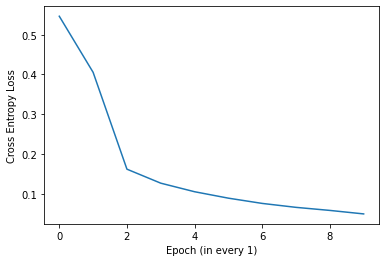

In [ ]:
import matplotlib
import matplotlib.pyplot as plt


plt.plot(loss)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('Epoch (in every 1)')
plt.show()

In [ ]:
epoch = list(range(0,10,1));

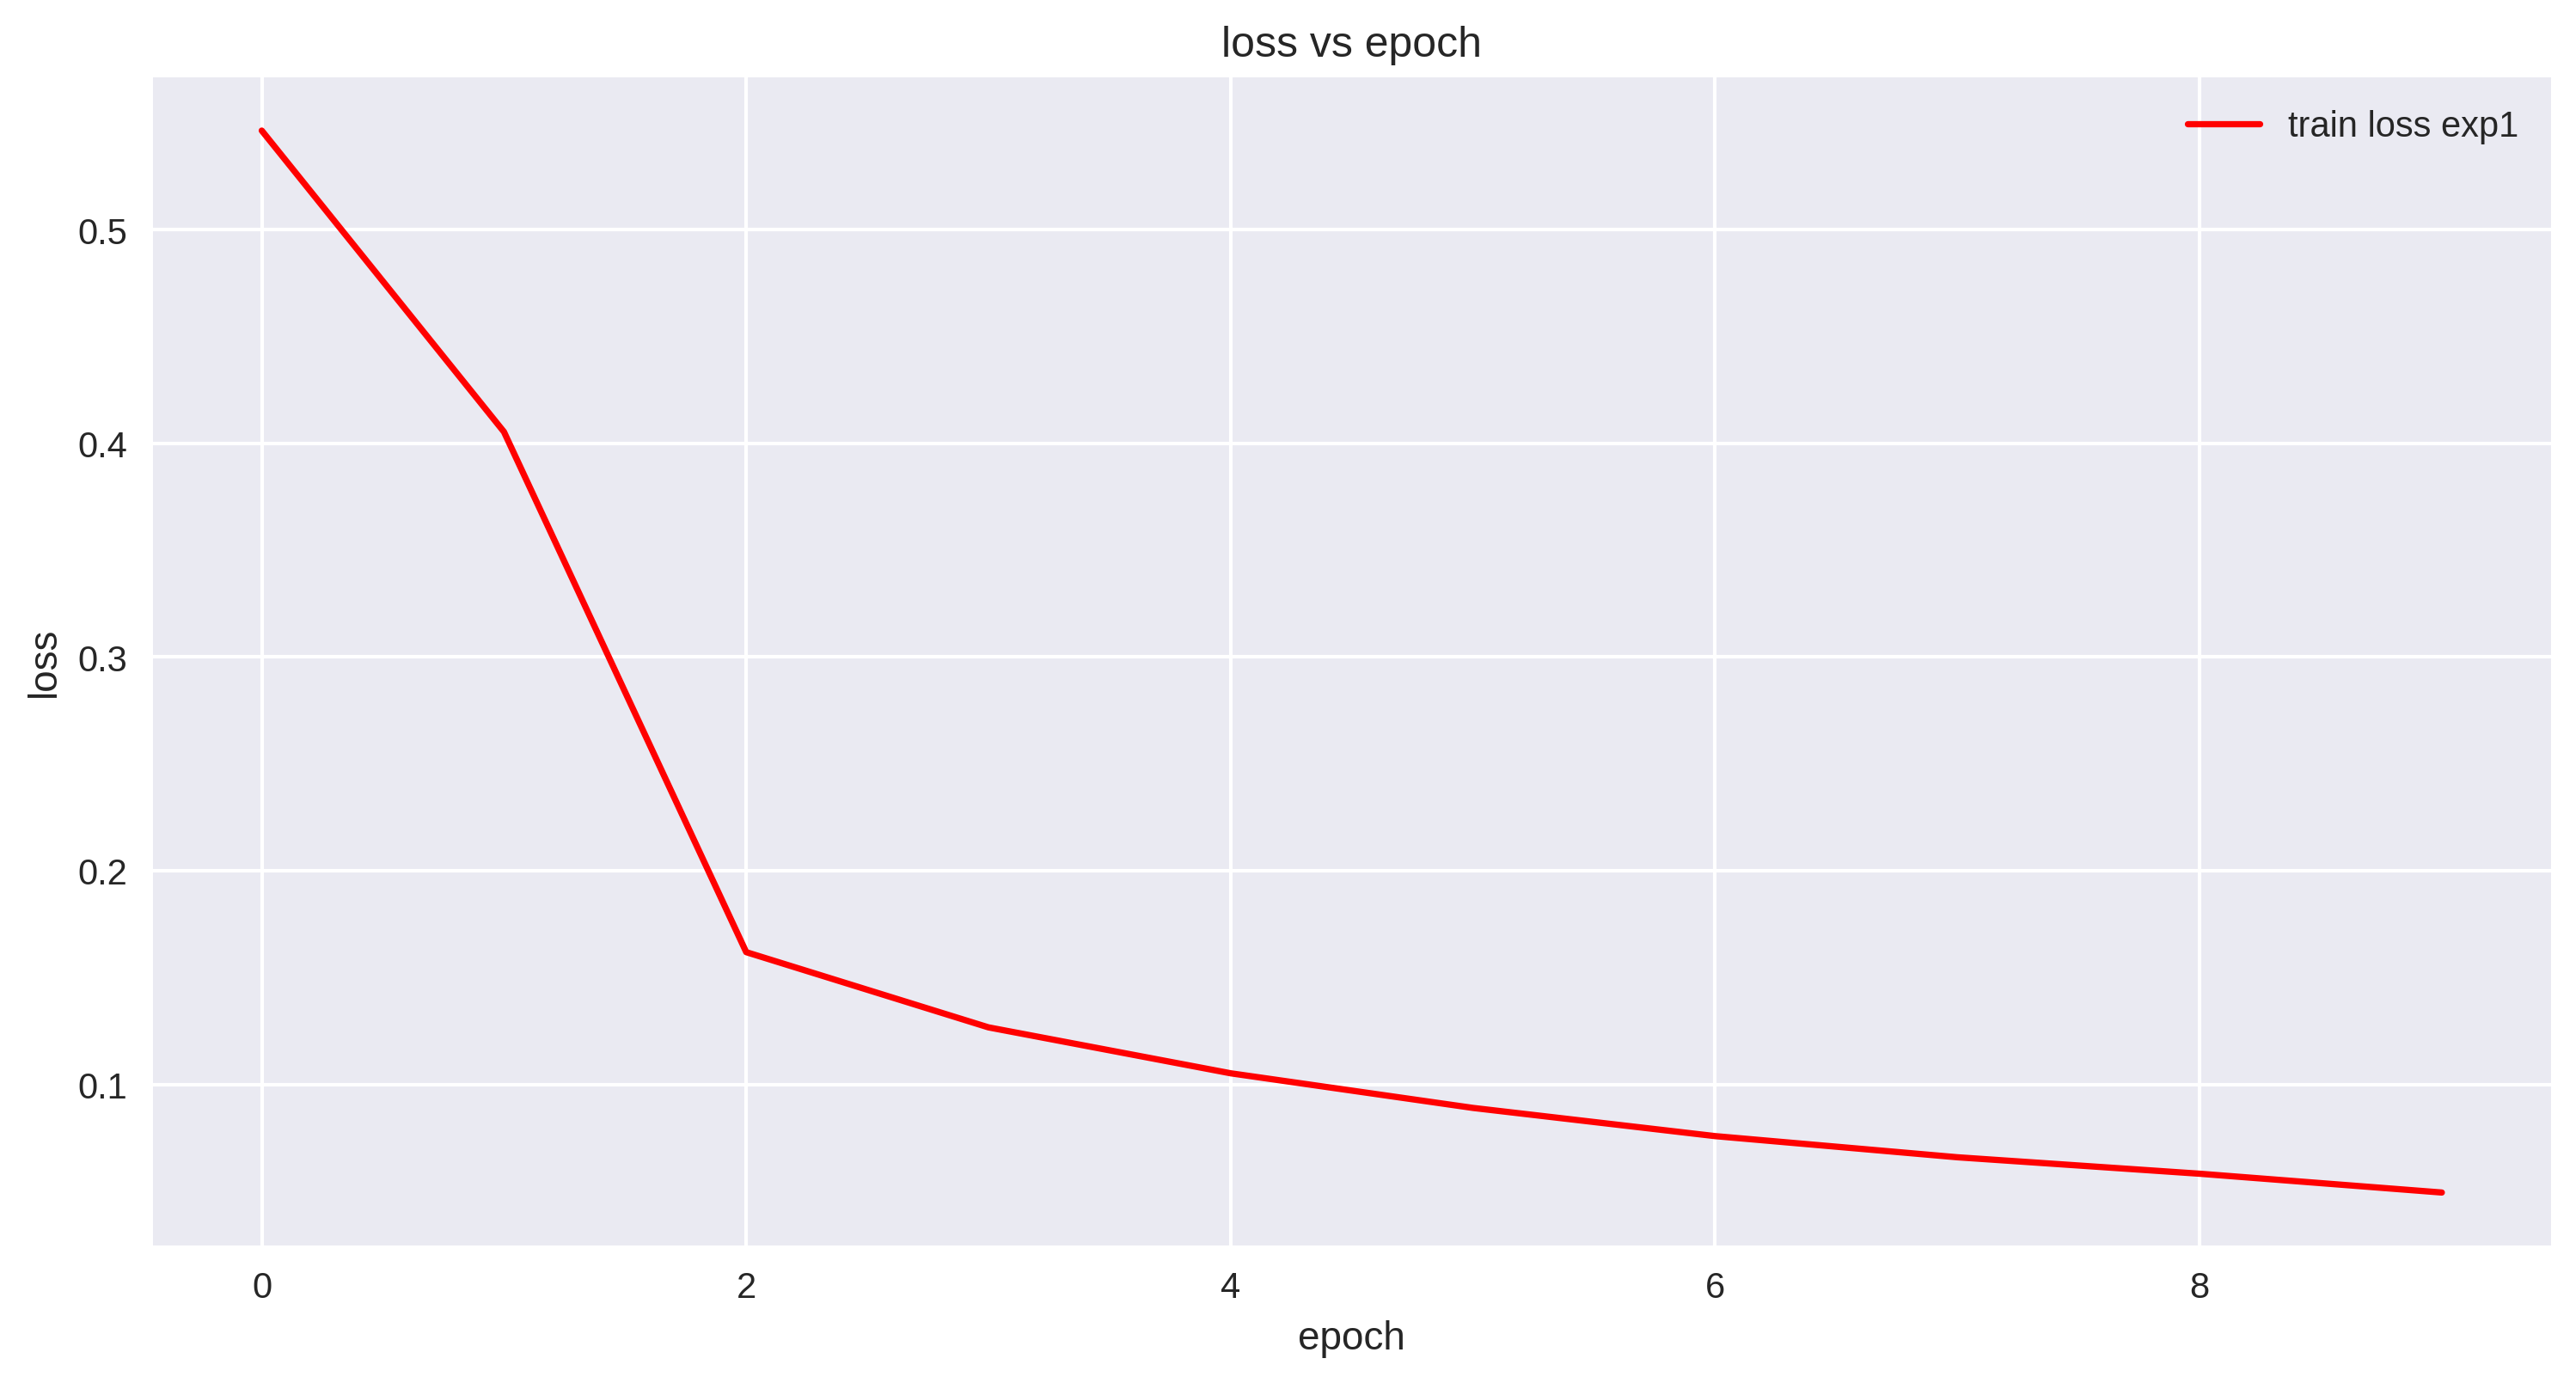

In [ ]:
plt.figure(figsize=(12,6),dpi=300);
plt.style.use('seaborn');

plt.plot(epoch , loss, color='red',label='train loss exp1');
plt.title('loss vs epoch');
plt.xlabel('epoch');
plt.ylabel('loss');
plt.grid(True); #create a grid layout
plt.legend();
plt.show()

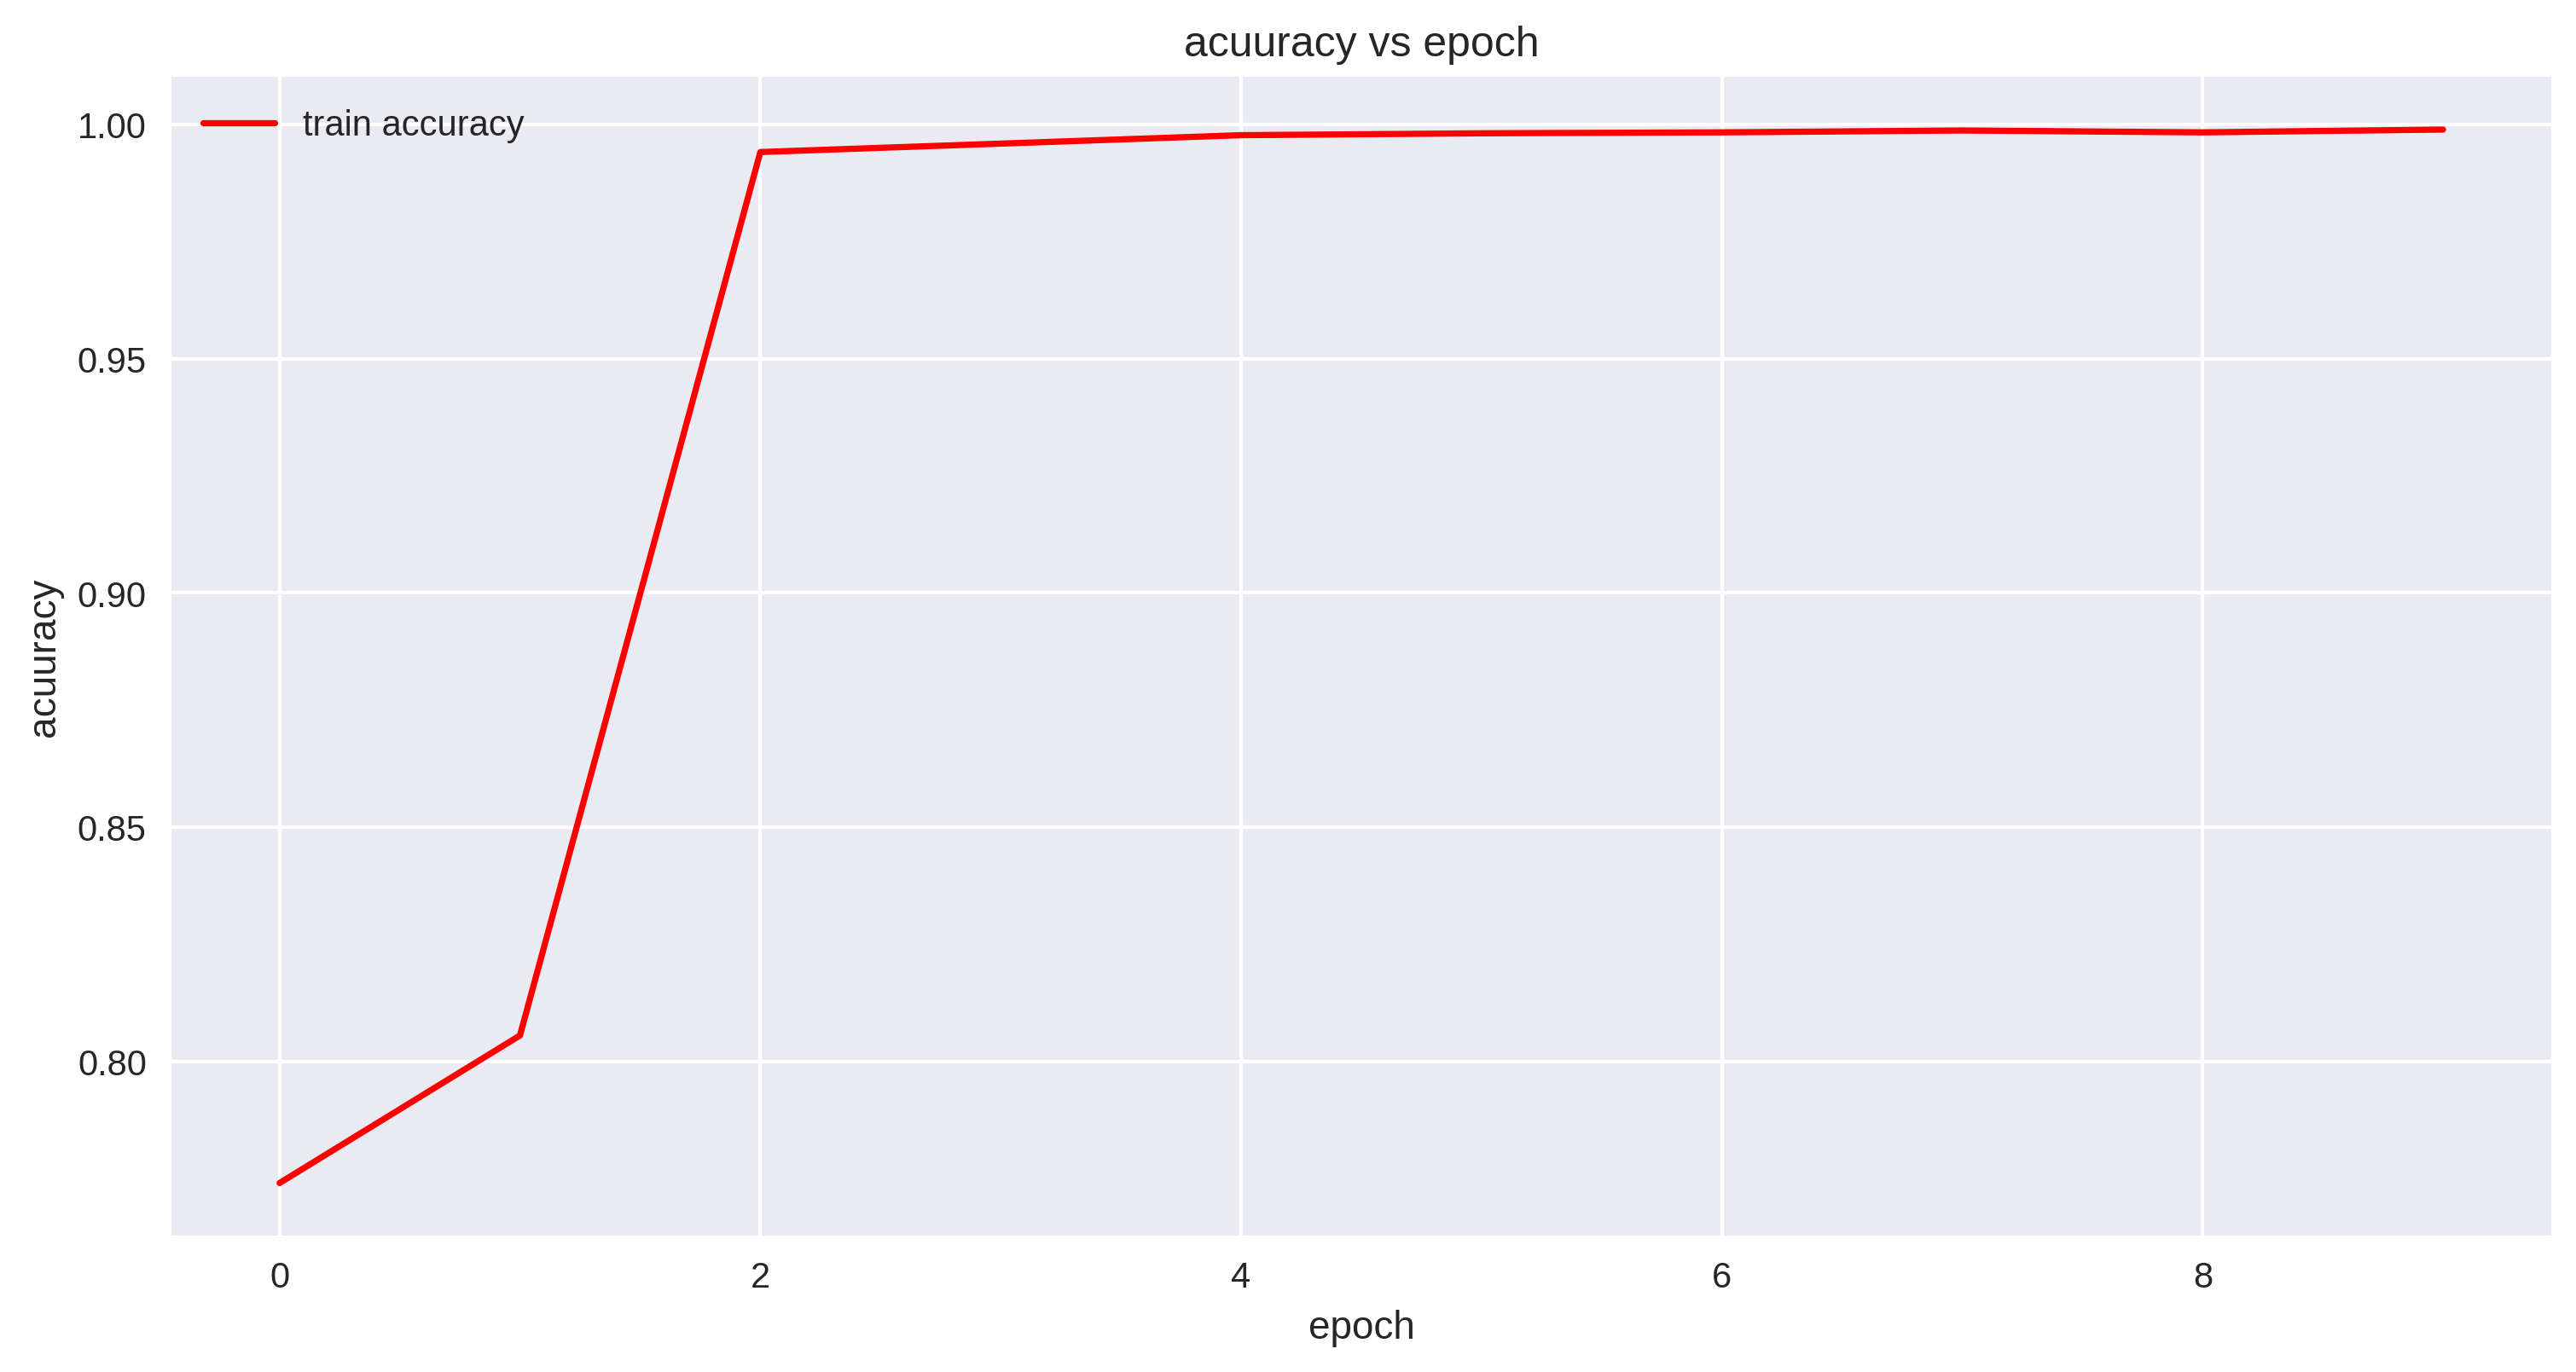

In [ ]:
plt.figure(figsize=(12,6),dpi=300);
plt.style.use('seaborn');

plt.plot(epoch , acuuracy, color='red',label='train accuracy');
plt.title('acuuracy vs epoch');
plt.xlabel('epoch');
plt.ylabel('acuuracy');
plt.grid(True); #create a grid layout
plt.legend();
plt.show()

In [ ]:
print("Accuracy of the model on Training Data is - " , model.evaluate(X_train,y_train)[1]*100 , "%")
print("Accuracy of the model on Testing Data is - " , model.evaluate(X_test,y_test)[1]*100 , "%")

258/258 [==============================] - 124s 480ms/step - loss: 0.0467 - accuracy: 0.9992
Accuracy of the model on Training Data is -  99.91516470909119 %
65/65 [==============================] - 31s 476ms/step - loss: 0.0763 - accuracy: 0.9927
Accuracy of the model on Testing Data is -  99.27290081977844 %


In [ ]:
print (history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


# Training Tesing Accuracy and loss

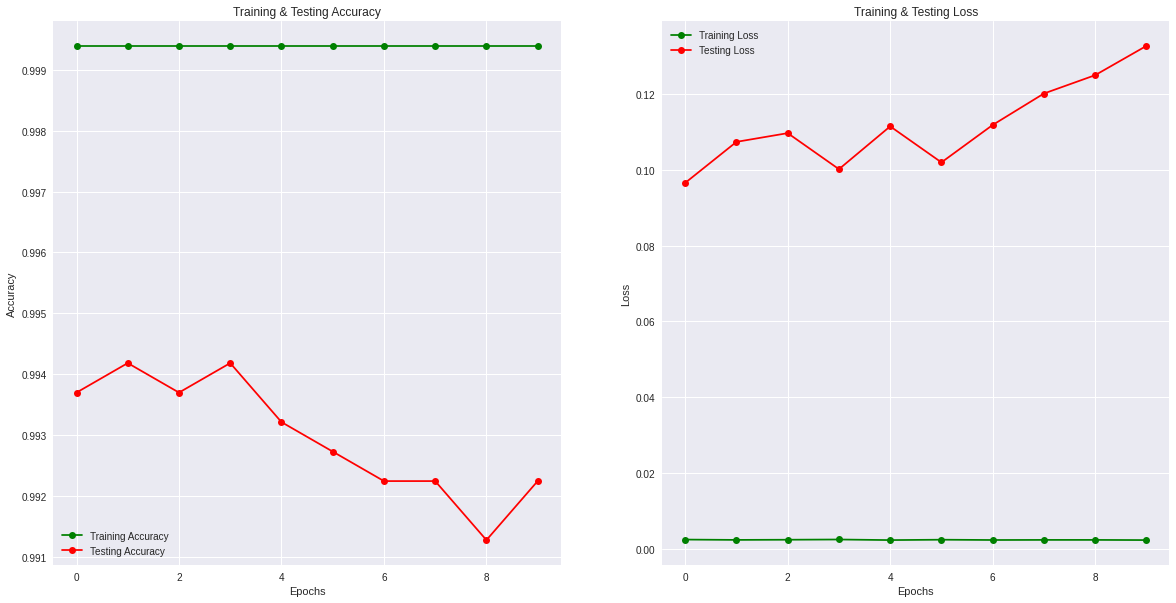

In [ ]:
epochs = [i for i in range(10)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Testing Accuracy')
ax[0].set_title('Training & Testing Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'go-' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'ro-' , label = 'Testing Loss')
ax[1].set_title('Training & Testing Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
plt.show()

In [ ]:
pred=model.predict(X_test)

In [ ]:
for i in range(len(pred)):
    if pred[i]>0.5:
        pred[i]=1
    elif pred[i]<=0.5:
        pred[i]=0

# Accuracy, Precision and Recall

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
accuracy_of_model = accuracy_score(y_test,pred)
precision_of_model = precision_score(y_test, pred)
recall_of_model = recall_score(y_test, pred)

In [ ]:
print('For CNN:')
print("  Accuracy : {0} \n Precision : {1} \n Recall : {2}".format(accuracy_of_model,precision_of_model, recall_of_model))

For CNN:
  Accuracy : 0.9922443044110518 
 Precision : 0.9931662870159453 
 Recall : 0.9710467706013363


**Confusion Matrix**

For CNN


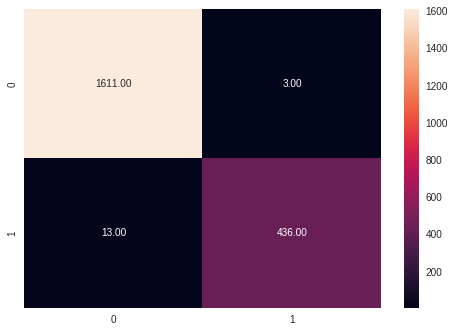

In [ ]:
from sklearn.metrics import confusion_matrix
cnn_cm =confusion_matrix(y_test,pred)
import seaborn as sns
print("For CNN")
sns.heatmap(cnn_cm, annot=True,fmt='0.2f')

In [ ]:
from sklearn.metrics import classification_report
print('For CNN :')
print(classification_report(y_test,pred))

For CNN :
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1614
           1       0.99      0.97      0.98       449

    accuracy                           0.99      2063
   macro avg       0.99      0.98      0.99      2063
weighted avg       0.99      0.99      0.99      2063



## Tesing WIth Input

In [ ]:
from keras.models import load_model
import pickle

model.save('my_model_cnn.h5')
with open('vectorizer_cnn', 'wb') as fin:
    pickle.dump(vectorizer, fin)

In [ ]:
import keras
from keras.models import load_model
import pickle
import tensorflow as tf


mymodel = tf.keras.models.load_model('my_model_cnn.h5')
myvectorizer = pickle.load(open("vectorizer_cnn", 'rb'))




def clean_data(input_val):

    input_val=input_val.replace('\n', '')
    input_val=input_val.replace('%20', ' ')
    input_val=input_val.replace('=', ' = ')
    input_val=input_val.replace('((', ' (( ')
    input_val=input_val.replace('))', ' )) ')
    input_val=input_val.replace('(', ' ( ')
    input_val=input_val.replace(')', ' ) ')
    input_val=input_val.replace('1 ', 'numeric')
    input_val=input_val.replace(' 1', 'numeric')
    input_val=input_val.replace("'1 ", "'numeric ")
    input_val=input_val.replace(" 1'", " numeric'")
    input_val=input_val.replace('1,', 'numeric,')
    input_val=input_val.replace(" 2 ", " numeric ")
    input_val=input_val.replace(' 3 ', ' numeric ')
    input_val=input_val.replace(' 3--', ' numeric--')
    input_val=input_val.replace(" 4 ", ' numeric ')
    input_val=input_val.replace(" 5 ", ' numeric ')
    input_val=input_val.replace(' 6 ', ' numeric ')
    input_val=input_val.replace(" 7 ", ' numeric ')
    input_val=input_val.replace(" 8 ", ' numeric ')
    input_val=input_val.replace('1234', ' numeric ')
    input_val=input_val.replace("22", ' numeric ')
    input_val=input_val.replace(" 8 ", ' numeric ')
    input_val=input_val.replace(" 200 ", ' numeric ')
    input_val=input_val.replace("23 ", ' numeric ')
    input_val=input_val.replace('"1', '"numeric')
    input_val=input_val.replace('1"', '"numeric')
    input_val=input_val.replace("7659", 'numeric')
    input_val=input_val.replace(" 37 ", ' numeric ')
    input_val=input_val.replace(" 45 ", ' numeric ')

    return input_val








def predict_cyber_bullying():
    
    repeat=True
    
    beautify=''
    for i in range(4):
        beautify+= "*"

    print(beautify) 
    input_val=input("Enter a sentence : ")


    
    if input_val== '0':
        repeat=False
    
    

    input_val=clean_data(input_val)
    input_val=[input_val]



    input_val=myvectorizer.transform(input_val).toarray()
    
   # input_val.shape=(1,64,64,1)

    result=mymodel.predict(input_val)


#     print(beautify
    
    
    if repeat == True:
        
        if result>0.5:
            print("ALERT!!!! Cyber Bullying Detected")


        elif result<=0.5:
            print("It is normal")
            
        print(beautify)
            
        #predict_sqli_attack()
            
    elif repeat == False:
        print( " Closing detection ")


In [ ]:
predict_cyber_bullying()

****
Enter a sentence : @arredondoalex4 @grvtyUK @blcklistddd same my playlist is already full of depression :)
ALERT!!!! Cyber Bullying Detected
****
